In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import all libraries required for the code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


,No.of missing entries,Variable
0,177,age
1,2,embarked
2,0,survived
3,0,pclass
4,0,sex
5,0,sibsp
6,0,parch
7,0,fare
8,0,class
9,0,who


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Missing
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


Text(0.5, 0, 'No. of missing entries for passengers')

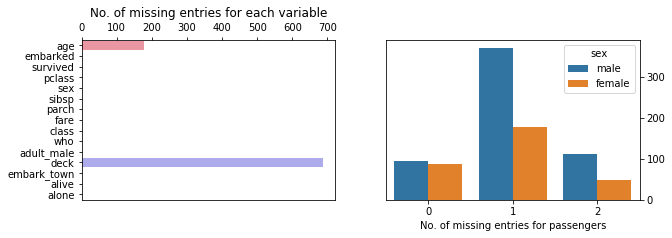

In [287]:
#View your Dataset
titanic=sns.load_dataset("titanic")
titanic.info()

#Horizontal Plot 
Y=[177,2,0,0,0,0,0,0,0,0,0,688,2,0,0] #Missing for each variable
X=['age','embarked','survived','pclass','sex','sibsp','parch','fare','class','who','adult_male','deck',
  'embark_town','alive','alone'] #Variables

#Plot using seaborn by taking data from a Pandas dataframe
MissingData={'No.of missing entries':Y,'Variable':X}
Missing=pd.DataFrame(MissingData, columns=['No.of missing entries', 'Variable'])
display(Missing)

fig1=plt.figure(figsize=(10,10))
ax=fig1.add_subplot(321)
ax=sns.barplot(x=Y, y=X, data=Missing)
ax.xaxis.set_ticks_position('top')
ax.set_title('No. of missing entries for each variable') 


#Vertical Plot
Missing=titanic.isnull().sum(axis=1) #Get the no. of missing entries for eah row/passenger
titanic['Missing']=Missing #Add a new column displaying the no. of mising entries for each passenger
display(titanic)


ax1=fig1.add_subplot(322)
ax1=sns.countplot(titanic["Missing"], hue=titanic["sex"])
ax1.yaxis.set_ticks_position('right')
ax1.set_ylabel('')
ax1.set_xlabel('No. of missing entries for passengers')


The above code shows:
1. A horizontal barplot for missing data in each column (variable)
2. A vertical barplot for missing data in each row (passenger) separated by gender

Text(0.5, 0, 'No. of missing entries for passengers')

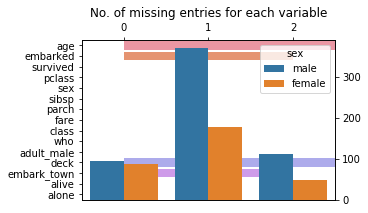

In [299]:
#View your Dataset
titanic=sns.load_dataset("titanic")


#Horizontal Plot 
Y=[177,2,0,0,0,0,0,0,0,0,0,688,2,0,0] #Missing for each variable
X=['age','embarked','survived','pclass','sex','sibsp','parch','fare','class','who','adult_male','deck',
  'embark_town','alive','alone'] #Variables

#Plot using seaborn by taking data from a Pandas dataframe
MissingData={'No.of missing entries':Y,'Variable':X}
Missing=pd.DataFrame(MissingData, columns=['No.of missing entries', 'Variable'])


fig1=plt.figure(figsize=(10,10))
ax=fig1.add_subplot(321)
ax=sns.barplot(x=Y, y=X, data=Missing)
ax.xaxis.set_ticks_position('top')
ax.set_title('No. of missing entries for each variable') 


#Vertical Plot
Missing=titanic.isnull().sum(axis=1) #Get the no. of missing entries for eah row/passenger
titanic['Missing']=Missing #Add a new column displaying the no. of mising entries for each passenger



ax1=ax.twinx()
ax1=sns.countplot(titanic["Missing"], hue=titanic["sex"])
ax1.yaxis.set_ticks_position('right')
ax1.set_ylabel('')
ax1.set_xlabel('No. of missing entries for passengers')




The same code as above except that both axes are on the same plot
I don't understand why the horizontal plots get a bit distorted when put together on the same figure with the vertical plots.

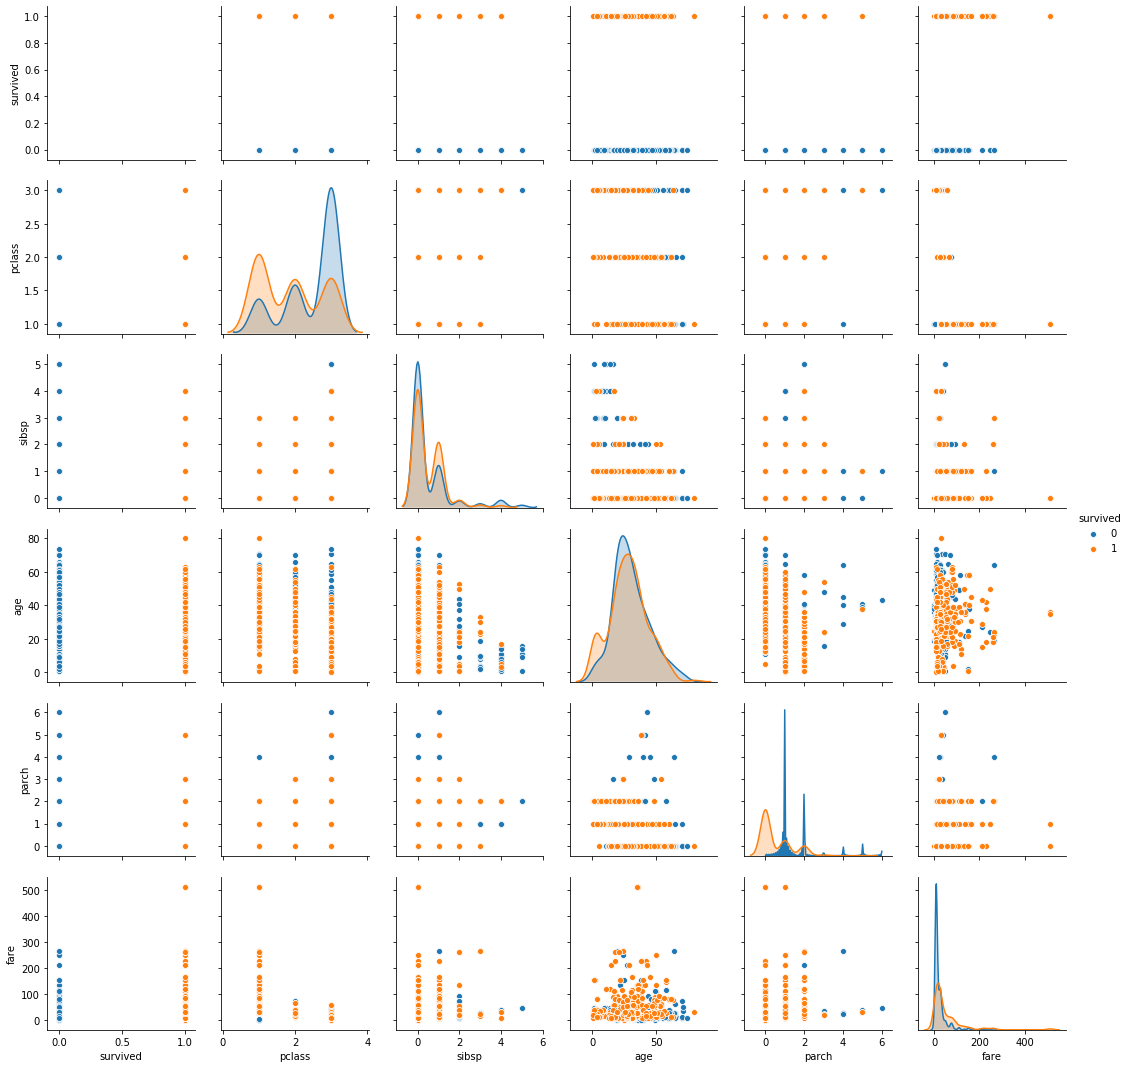

In [255]:
#Pairplot for all the numerical variables
titanic=titanic.dropna(subset=['age'], how='any')  #Drop the rows which don't have a value for age

ax=sns.pairplot(data=titanic,vars=["survived","pclass","sibsp","age","parch","fare"],hue='survived')

The above code shows pairplots for the numerical variables in Titanic

Text(0, 0.5, '')

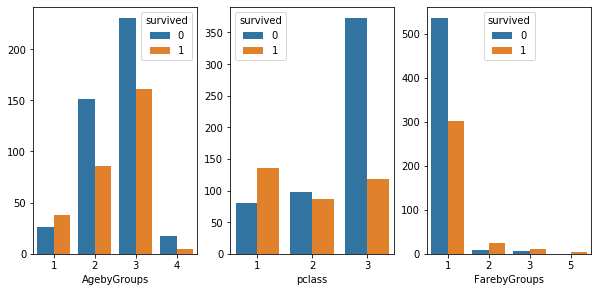

In [270]:
#Add a new figure
fig2=plt.figure(figsize=(10,10))

#Age classes (1-85 years):{1.Child (1-10), 2.Younger adult (11-25), 3.Adult (26-60), 4.Older adult (60-85)}

#Process your data to group by 'age'
age=[] #Create an empty list
age=titanic['age'].tolist() #Store the 'age' values in the list
agebygroup=[] #Create another empty list to group by 'age'

#Group age into 4 categories
for i in age:
    if i>0 and i<=10: #Child
        i=1
        agebygroup.append(i)
    if i>10 and i<=25: #Younger adult
        i=2
        agebygroup.append(i)
    if i>25 and i<=60: #Adult
        i=3
        agebygroup.append(i)
    if i>60: #Older adult
        i=4
        agebygroup.append(i)
        
#Add the age group as a separate column in your dataset
titanic['AgebyGroups']=agebygroup

#Survival according to the age of passengers
ax1=fig2.add_subplot(231)
ax1=sns.countplot(titanic['AgebyGroups'],hue=titanic['survived'])
ax1.set_ylabel('')

#Survival according to the pclass of passengers
ax2=fig2.add_subplot(232)
#Load the unmodified dataset again
titanic1=sns.load_dataset("titanic")
ax2=sns.countplot(titanic1['pclass'],hue=titanic1['survived'])
ax2.set_ylabel('')

#Fare classes (1.Cheapest:0-100, 2.Cheap:100-200, 3.Moderate:200-300, 4.Expensive:300-400, 5.Deluxe:400-550)

#Process your data to group by 'fare'
fare=[] #Create an empty list
fare=titanic1['fare'].tolist() #Store the 'age' values in the list
farebygroup=[] #Create another empty list to group by 'age'

#Group age into 4 categories
for i in fare:
    if i>=0 and i<=100: #Cheapest
        i=1
        farebygroup.append(i)
    if i>100 and i<=200: #Cheap
        i=2
        farebygroup.append(i)
    if i>200 and i<=300: #Moderate
        i=3
        farebygroup.append(i)
    if i>300 and i<=400: #Expensive
        i=4
        farebygroup.append(i)
    if i>400 and i<=600: #Deluxe
        i=5
        farebygroup.append(i)
        
#Add the age group as a separate column in your dataset
titanic1['FarebyGroups']=farebygroup


#Survival according to the fare paid by passengers
#Fare classes - 
ax3=fig2.add_subplot(233)
ax3=sns.countplot(titanic1['FarebyGroups'],hue=titanic1['survived'])
ax3.set_ylabel('')

The above code shows the plots of 'age', 'pclass' and 'fare' grouped according to their range and colored based 
on survival.